## Setup

In [19]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from wordcloud import WordCloud, STOPWORDS

## Data

In [20]:
# Data Ingestion
df = pd.read_csv("../dataset/news_dataset.csv")
df.head()

,Title,Publisher,DateTime,Link,Category
0,"Chainlink (LINK) Falters, Hedera (HBAR) Wobble...",Analytics Insight,2023-08-30T06:54:49Z,https://news.google.com/articles/CBMibGh0dHBzO...,Business
1,Funds punished for owning too few Nvidia share...,ZAWYA,2023-08-30T07:15:59Z,https://news.google.com/articles/CBMigwFodHRwc...,Business
2,Crude oil prices stalled as hedge funds sold: ...,ZAWYA,2023-08-30T07:31:31Z,https://news.google.com/articles/CBMibGh0dHBzO...,Business
3,Grayscale's Bitcoin Win Is Still Only Half the...,Bloomberg,2023-08-30T10:38:40Z,https://news.google.com/articles/CBMib2h0dHBzO...,Business
4,"I'm a Home Shopping Editor, and These Are the ...",Better Homes & Gardens,2023-08-30T11:00:00Z,https://news.google.com/articles/CBMiPWh0dHBzO...,Business


Text(0.5, 1.0, 'Category Distribution')

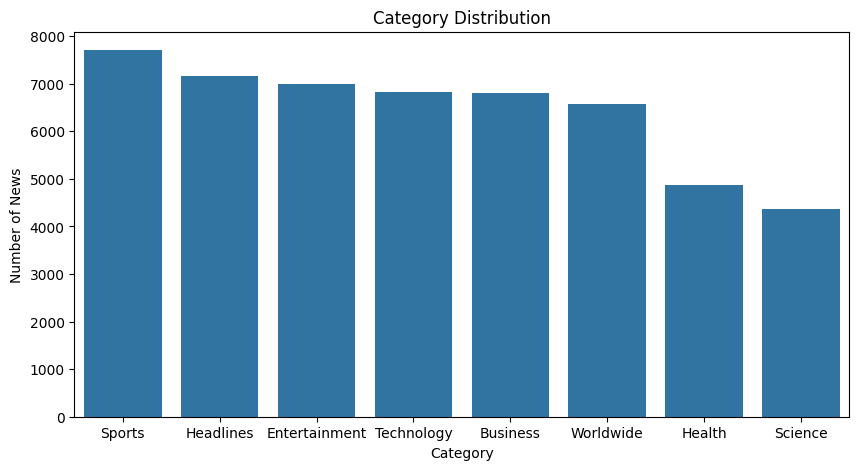

In [21]:
# Distribution Bar plot (Count plot)
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Category"].value_counts().index, y=df["Category"].value_counts())
plt.ylabel("Number of News")
plt.title("Category Distribution")

**There's no extreme data imbalance except "Health" and "Science" news are almost half the "Sports" (majority) news.**

In [22]:
# Word cloud
categories = df["Category"].unique().tolist()


@widgets.interact(category=categories)
def display_categotical_plots(category=categories[0]):
    subset = df[df["Category"] == category].sample(n=100, random_state=42)
    text = subset["Title"].values
    cloud = WordCloud(stopwords=STOPWORDS, background_color="black", collocations=False, width=600, height=400).generate(" ".join(text))
    plt.axis("off")
    plt.imshow(cloud)

interactive(children=(Dropdown(description='category', options=('Business', 'Entertainment', 'Headlines', 'Hea…

**From the word cloud we can immediately draw one insight about the redundant key words like "New" which is coming a lot in different categories.**</br>
We can also see some action verbs, adjectives, adverbs which need to be removed to some extent before training the model.**</br>
Other than that the word cloud seems very intuitive to what the respective categorical tag/name is.</br></br>
We can also see the "Headlines" category contains mixed words (will be mixed as it can be a ground breaking news of any category), so we'll hold out those data instances as a test set without targets just to analyze the number of headlines with different categories.